In [1]:
import scipy.io as sio
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import timeit
plt.rcParams['figure.figsize'] = [15, 10]
ds = sio.loadmat('face.mat')

In [2]:
X = ds['X']
l = ds['l'][0]
split = 0.75
W = 46
H = 56
X = pd.DataFrame(X.transpose())
N = X.shape[0]*split
l = pd.DataFrame(l)

In [3]:
X_train, X_test, l_train, l_test = train_test_split(X, l, test_size=(1-split))
# X_bar = np.mean(X, axis=1)
X_train, X_test = np.transpose(X_train.values), np.transpose(X_test.values)
X_bar = np.transpose([np.mean(X_train, axis=1)])

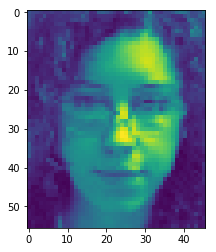

In [4]:
A = np.subtract(X_train,X_bar)
# print(A.shape)
# print(np.transpose(X_train)[0]/255)
mean_img = np.transpose(np.array_split(np.concatenate(X_bar,axis=0)/255, W))
person = np.transpose(np.array_split(np.transpose(X_train)[0]/255, W))
# print(person)
imgplot = plt.imshow(person)

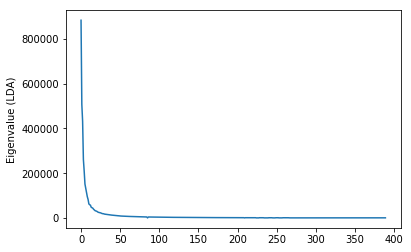

In [20]:
S_LDA = np.matmul(np.transpose(A),A)/N
w_lda, v_lda = np.linalg.eig(S_LDA)
# v_lda = np.transpose(v_lda)
# [v_lda for w_lda,v_lda in sorted(zip(w_lda, v_lda), reverse=True)]
# v_lda = np.transpose(v_lda)
plt.plot(w_lda)
plt.ylabel('Eigenvalue (LDA)')
plt.show()

(100,)
(2576, 100)
(2576, 390)
(390, 100)
(2576, 1)
(2576, 1)


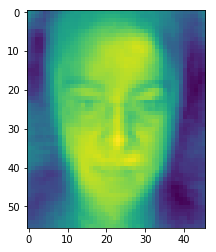

In [62]:
M = w_lda[:100]
V = v_lda[:,:100]
U = np.matmul(A,V)
print(M.shape)
print(U.shape)
print(A.shape)
a = np.matmul(np.transpose(A),U)
print(a.shape)
test = a[0]
unknown = np.matmul(np.diag(test),np.transpose(U))
# guess = unknown
guess = np.atleast_2d(unknown.sum(axis=0))
print(X_bar.shape)
guess = np.add(np.transpose(guess),X_bar)
print(guess.shape)
maybe_a_person = np.transpose(np.array_split(np.transpose(guess)[0]/255, W))
imgplot = plt.imshow(maybe_a_person)